## AMATH Scientific Computing
### Homework-3
#### Manjaree Binjolkar

In [1]:
import numpy as np
import scipy.sparse 
import matplotlib.pyplot as plt
import pdb
import numpy.matlib
import time
import copy

from matplotlib import animation, rc
from scipy.sparse.linalg import spsolve
from scipy.integrate import solve_ivp
from scipy.sparse.linalg import splu
from scipy.sparse import csr_matrix, triu, spdiags


import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
#conda install -c conda-forge ffmpeg

### Q1

(a) Setup the matrix $A ≈ ∂x$ using second-order central differences and sparse
storage.

(b) Solve the advection equation with $c(x,t) = −0.5$, this corresponds to a constant velocity field. In other words, solve $ut= 0.5Au $.

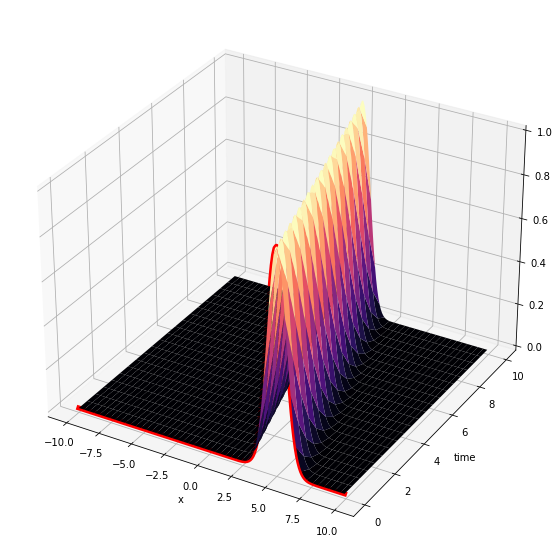

In [3]:
#define our initial condition
f = lambda x: np.exp(-(x-5)**2) #gaussian initial condition
L = 10
dx = 0.1
x = np.arange(-L,L,0.1)
#print(x)
N = len(x)
dt = 0.5 #step size
times = np.arange(0,10+dt, dt)
#print(times)
#np.shape(times)
#type(times)
#times
c = -0.5
#function for adevction equation
def advecPDE(t, x, A, c):
    u_t = -c*A*x #time derivative
    return u_t

#creating sparse matrix A
e = np.ones((N))
Bin = np.array([5*e, -5*e, -0*e, 5*e, -5*e])
d = np.array([-N+1, -1, 0, 1, N-1])
A = spdiags(Bin, d, N, N)
#print(A.toarray()[0:4,0:4])
#print(A.toarray())

A1 = copy.deepcopy(A.todense())




#print(A1)
#A = A/(dx*2) #from piazza discussion
#print(A.toarray())
#plt.spy(A)
y0 = f(x)

tic =time.time()
sol =solve_ivp(lambda t,x: advecPDE(t,x,A,c), [0,10], y0, t_eval = times)
toc = time.time()
#print(toc-tic)

#print('x = ',np.shape(x))
#print('y = ',np.shape(sol.y))
#print('t = ',np.shape(sol.t))

A2 = copy.deepcopy(sol.y)


X, T = np.meshgrid(x,sol.t)
fig, ax = plt.subplots(subplot_kw = {"projection":"3d"}, figsize =(25,10))
surf = ax.plot_surface(X,T,sol.y.T, cmap='magma')
ax.plot3D(x,0*x,f(x),'-r',linewidth=5)
plt.xlabel('x')
plt.ylabel('time')
plt.show()

In [4]:
#Check
#np.shape(A1)
#np.shape(A2)

c) Solve the advection equation with
$c(x,t) = −(1 + 2 sin(5t) −H(x −4))$ ,
where
$H(z) =
1, z > 0
; 
0, z ≤0$

In [5]:
#A.toarray()
#print(x)
#print(times)

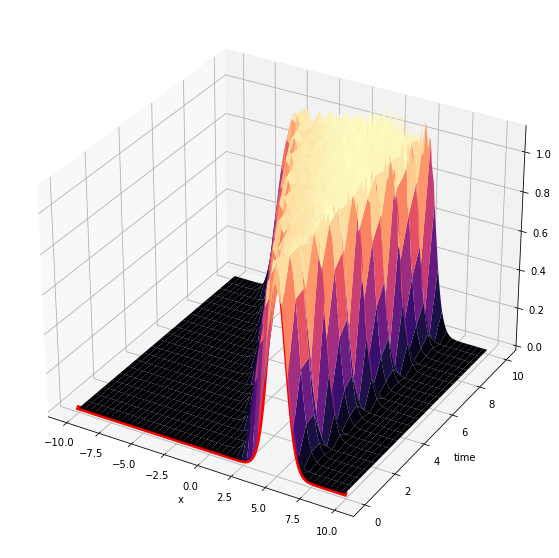

In [6]:
#define new function for c
def c_func(t,x):
    c = 1+2*np.sin(5*t)-(np.heaviside((x-4), 0))
    return c

def advecPDE_c(t, u, A, x):
    u_t = np.multiply(c_func(t,x),A@u) #time derivative
    return u_t

#print(y0)
tic = time.time()
sol = solve_ivp(lambda t,u : advecPDE_c(t, u, A, x), [0,10], y0, t_eval = times)
toc = time.time()
#print(toc-tic)

A3 = copy.deepcopy(sol.y)


X, T = np.meshgrid(x,sol.t)
fig, ax = plt.subplots(subplot_kw = {"projection":"3d"}, figsize =(25,10))
surf = ax.plot_surface(X,T,sol.y.T, cmap='magma')
ax.plot3D(x,0*x,f(x),'-r',linewidth=5)
plt.xlabel('x')
plt.ylabel('time')
plt.show()

In [7]:
#Check
#np.shape(A3)

### Q2

(a) Use sparse-matrix storage (spdiags) to generate the three matrices $ A = r2 =
@2
x + @2
y , B = @x, and  C = @y$ which take derivative in two dimensions. Use
the discretization of the domain and its transformation to a vector as in class.
Use the second-order central di erence formula for each matrix. To make sure
that A is nonsingular, set the  rst element of A ( rst row,  rst column) equal
to 2 instead of the usual -4

In [8]:
#setting up 
m = 64
n = m*m
x = np.linspace(-L, L, m, endpoint = False)
#x = x[0:-1]
y = np.linspace(-L, L, m, endpoint = False)
#y =y[0:-1]
dx = x[1] - x[0]
e1 =np.ones((n))
l1 =np.concatenate((np.ones(m-1), np.array([0])))
Low1 = np.matlib.repmat(l1,1,m).reshape(n)
l2 =np.concatenate((np.array([1]), np.zeros(m-1)))
Low2 = np.matlib.repmat(l2,1,m).reshape(n)
Up1 = np.roll(Low1,1)
Up2 = np.roll(Low2, m-1)

In [9]:
#Constructing A
Bin_A = np.array((e1, e1, Low2, Low1, -4*e1, Up1, Up2, e1, e1))
d_A = np.array([-(n-m), -m, -m+1, -1, 0, 1, m-1, m , (n-m)])

A = spdiags(Bin_A, d_A, n, n, format ='csc')
A[0,0] = 2
A = A/(dx**2)
#plt.spy(A)
#print(A.toarray())

A4 = copy.deepcopy(A.todense())

In [10]:
#Constructing B
Bin_B = np.array((e1, -e1, e1, -e1))
d_B = np.array([-(m**2-m), -m, m, (m**2-m)])

B = spdiags(Bin_B, d_B, n, n, format ='csc')
B = B/(2*dx)
#print(np.shape(B))
#print(B.toarray()[4:16,4:16])
#plt.spy(B)
#print(B.toarray())

A5 = copy.deepcopy(B.todense())

In [11]:
#Constructing C
Bin_C = np.array((Low2, -Low1, Up1, -Up2))
#d = np.array([ -(m-1), -1, 1, (m-1) ]) 
#d_C = np.array([ -3, -1, 1, 3 ]) 
d_C = np.array([ -(m-1), -1, 1, (m-1) ]) 

C = spdiags(Bin_C, d_C, n, n, format ='csc')
C = C/(dx*2)
#plt.spy(C)
#print(np.shape(C))
#print(C.toarray()[0:4,0:4])
#plt.spy(C)
#print(C.toarray())

A6 = copy.deepcopy(C.todense())

In [12]:
#Check 
#print(np.shape(A4))
#print(np.shape(A5))
#print(np.shape(A6))


(b) Now we want to integrate the equations numerically in time. Start by dis-
cretizing (2), using the matrices above, so that it is a linear problem.
Then discretize (1) using the matrices created above and use the built-in RK45
algorithm to step forward in time (your time step will include both solving
and the ODE (1)). In each step you will need to solve the linear
system $A~x =~b$. Do this in two separate ways:

i. using Gaussian Elimination (A\b in Matlab or
scipy.sparse.linalg.spsolve in python)

ii. using LU decomposition. When using LU decomposition, make sure to
create the matrices L; U; and P outside of the function and pass the decomposition into the function for a fast solve. If using python, use
scipy.sparse.linalg.splu.

In [40]:
#defining the initial values
nu = 0.001
L = 10
x = np.linspace(-L, L, 64, endpoint = False)
#x = x[0:-1]
y = np.linspace(-L, L, 64, endpoint = False)
#y = y[0:-1]

#making the meshgrid
yv, xv = np.meshgrid(x, y)

#setting up t
dt = 0.05
t = np.arange(0,4.5,dt)
#print(len(t))

#defining inital condition for omega
omega_0 = lambda x,y: np.exp(-2*(x**2)-(y**2)/20)
omega_0_val = omega_0(xv,yv).reshape(64*64)
#print(np.shape(omega_0_val))
#print(omega_0_val)

def rhs_ode_GE(t, omega, A, B, C):
        
        #solving for A.psi = w using GE
        #psi0 = spsolve(A,omega_0)
        psi = spsolve(A,omega)
        psi_x = B@psi
        psi_y = C@psi
        omega_x = B@omega
        omega_y = C@omega
        omega = nu*(A)@omega - np.multiply(psi_x,omega_y) + np.multiply(psi_y,omega_x)
         
        
        return omega

def rhs_ode_LU(t, omega, A, B, C):
        
        #solving for A.psi = w using GE
        #psi0 = spsolve(A,omega_0)
        plu = splu(A)
        psi = plu.solve(omega)
        psi_x = B@psi
        psi_y = C@psi
        omega_x = B@omega
        omega_y = C@omega
        omega = nu*(A)@omega - np.multiply(psi_x,omega_y) + np.multiply(psi_y,omega_x)
        
        return omega


In [41]:
#%%time
sol_GE = scipy.integrate.solve_ivp(lambda t,omega: rhs_ode_GE(t,omega, A, B, C), [0, 4], 
                                omega_0_val, t_eval = np.arange(0, 4+dt, dt))

A7 = copy.deepcopy(sol_GE.y.T)


In [42]:
#%%time
sol_LU = scipy.integrate.solve_ivp(lambda t,omega: rhs_ode_LU(t,omega, A, B, C), [0, 4], 
                                omega_0_val, t_eval = np.arange(0, 4+dt, dt))
A8 = copy.deepcopy(sol_GE.y.T)

In [43]:
#A9 = copy.deepcopy(A8.reshape(9,64,64))

In [44]:
#Check
#print(np.shape(A7))
#print(np.shape(A8))
#print(np.shape(A9))

In [45]:
#plt.spy(C)

In [46]:
#A6

In [47]:
#A2

In [48]:
np.shape(sol_GE.y.T.reshape(9,64,64))

ValueError: cannot reshape array of size 331776 into shape (9,64,64)

(81, 64, 64)


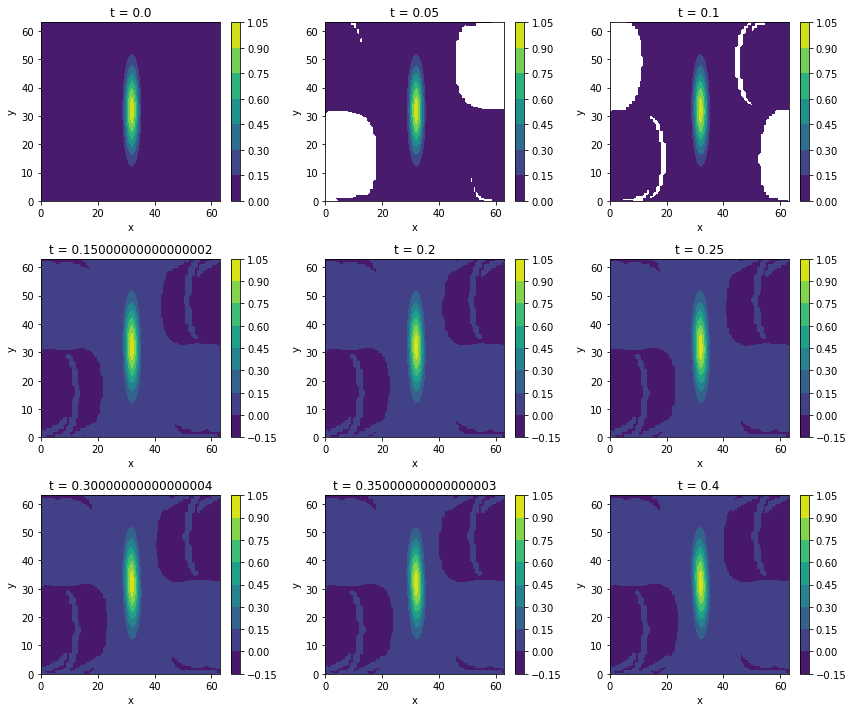

In [49]:
#reshaping sol.y
sol_y_reshaped = np.column_stack(sol_GE.y).reshape(-1,64,64)
print(np.shape(sol_y_reshaped))
#Plotting
f, axa = plt.subplots(3, 3, figsize=(12,10))
for ax, i in zip(axa.ravel(), range(len(t)+1)):
    #ax.imshow(sol_y_reshaped[i], interpolation = 'none');
    cp = ax.contourf(sol_y_reshaped[i].T,cmap = 'viridis');
    #ax.colorbar(cp)
    #cp = ax.pcolormesh(sol_y_reshaped[i].T,cmap='viridis',shading='auto')
    fig.colorbar(cp, ax = ax)
    ax.set_title("t = " + str(t[i]))
    ax.set_xlabel('x')
    ax.set_ylabel('y')
#plt.colorbar()
plt.tight_layout()

In [50]:
#initial animation
#import matplotlib.animation as animation
#plt.rcParams['animation.ffmpeg_path'] = r"C:\some_path\ffmpeg.exe"   # if necessary

# Generate data for plotting
Lx = Ly = 10
Nt = 9
x = xv
y = yv
i = 0

anim_mat = sol_GE.y.T.reshape(9,64,64)

fig = plt.figure()
ax = plt.axes(xlim=(-Lx, Lx), ylim=(-Ly, Ly), xlabel='x', ylabel='y')

cont = plt.contourf(anim_mat[0,:,:])
plt.colorbar(label = 'vorticity')

# animation function
def animate(i):
    global cont
  
    cont = ax.contourf(x, y, anim_mat[i])
    plt.title("time = " + str(t[i]))
    
    
    return cont

anim = animation.FuncAnimation(fig, animate, frames=Nt, 
                               #init_func=init, 
                               repeat=False)
anim.save('vortex_dynamics.mp4', writer=animation.FFMpegWriter())
anim

ValueError: cannot reshape array of size 331776 into shape (9,64,64)